### Importing the necessary libraries

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



### Data Loading

In [44]:
#Data loading
df = pd.read_csv("Bank Customer Churn Prediction.csv")
#First five rows
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis

In [45]:
#Investigate data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [46]:
#summary statistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


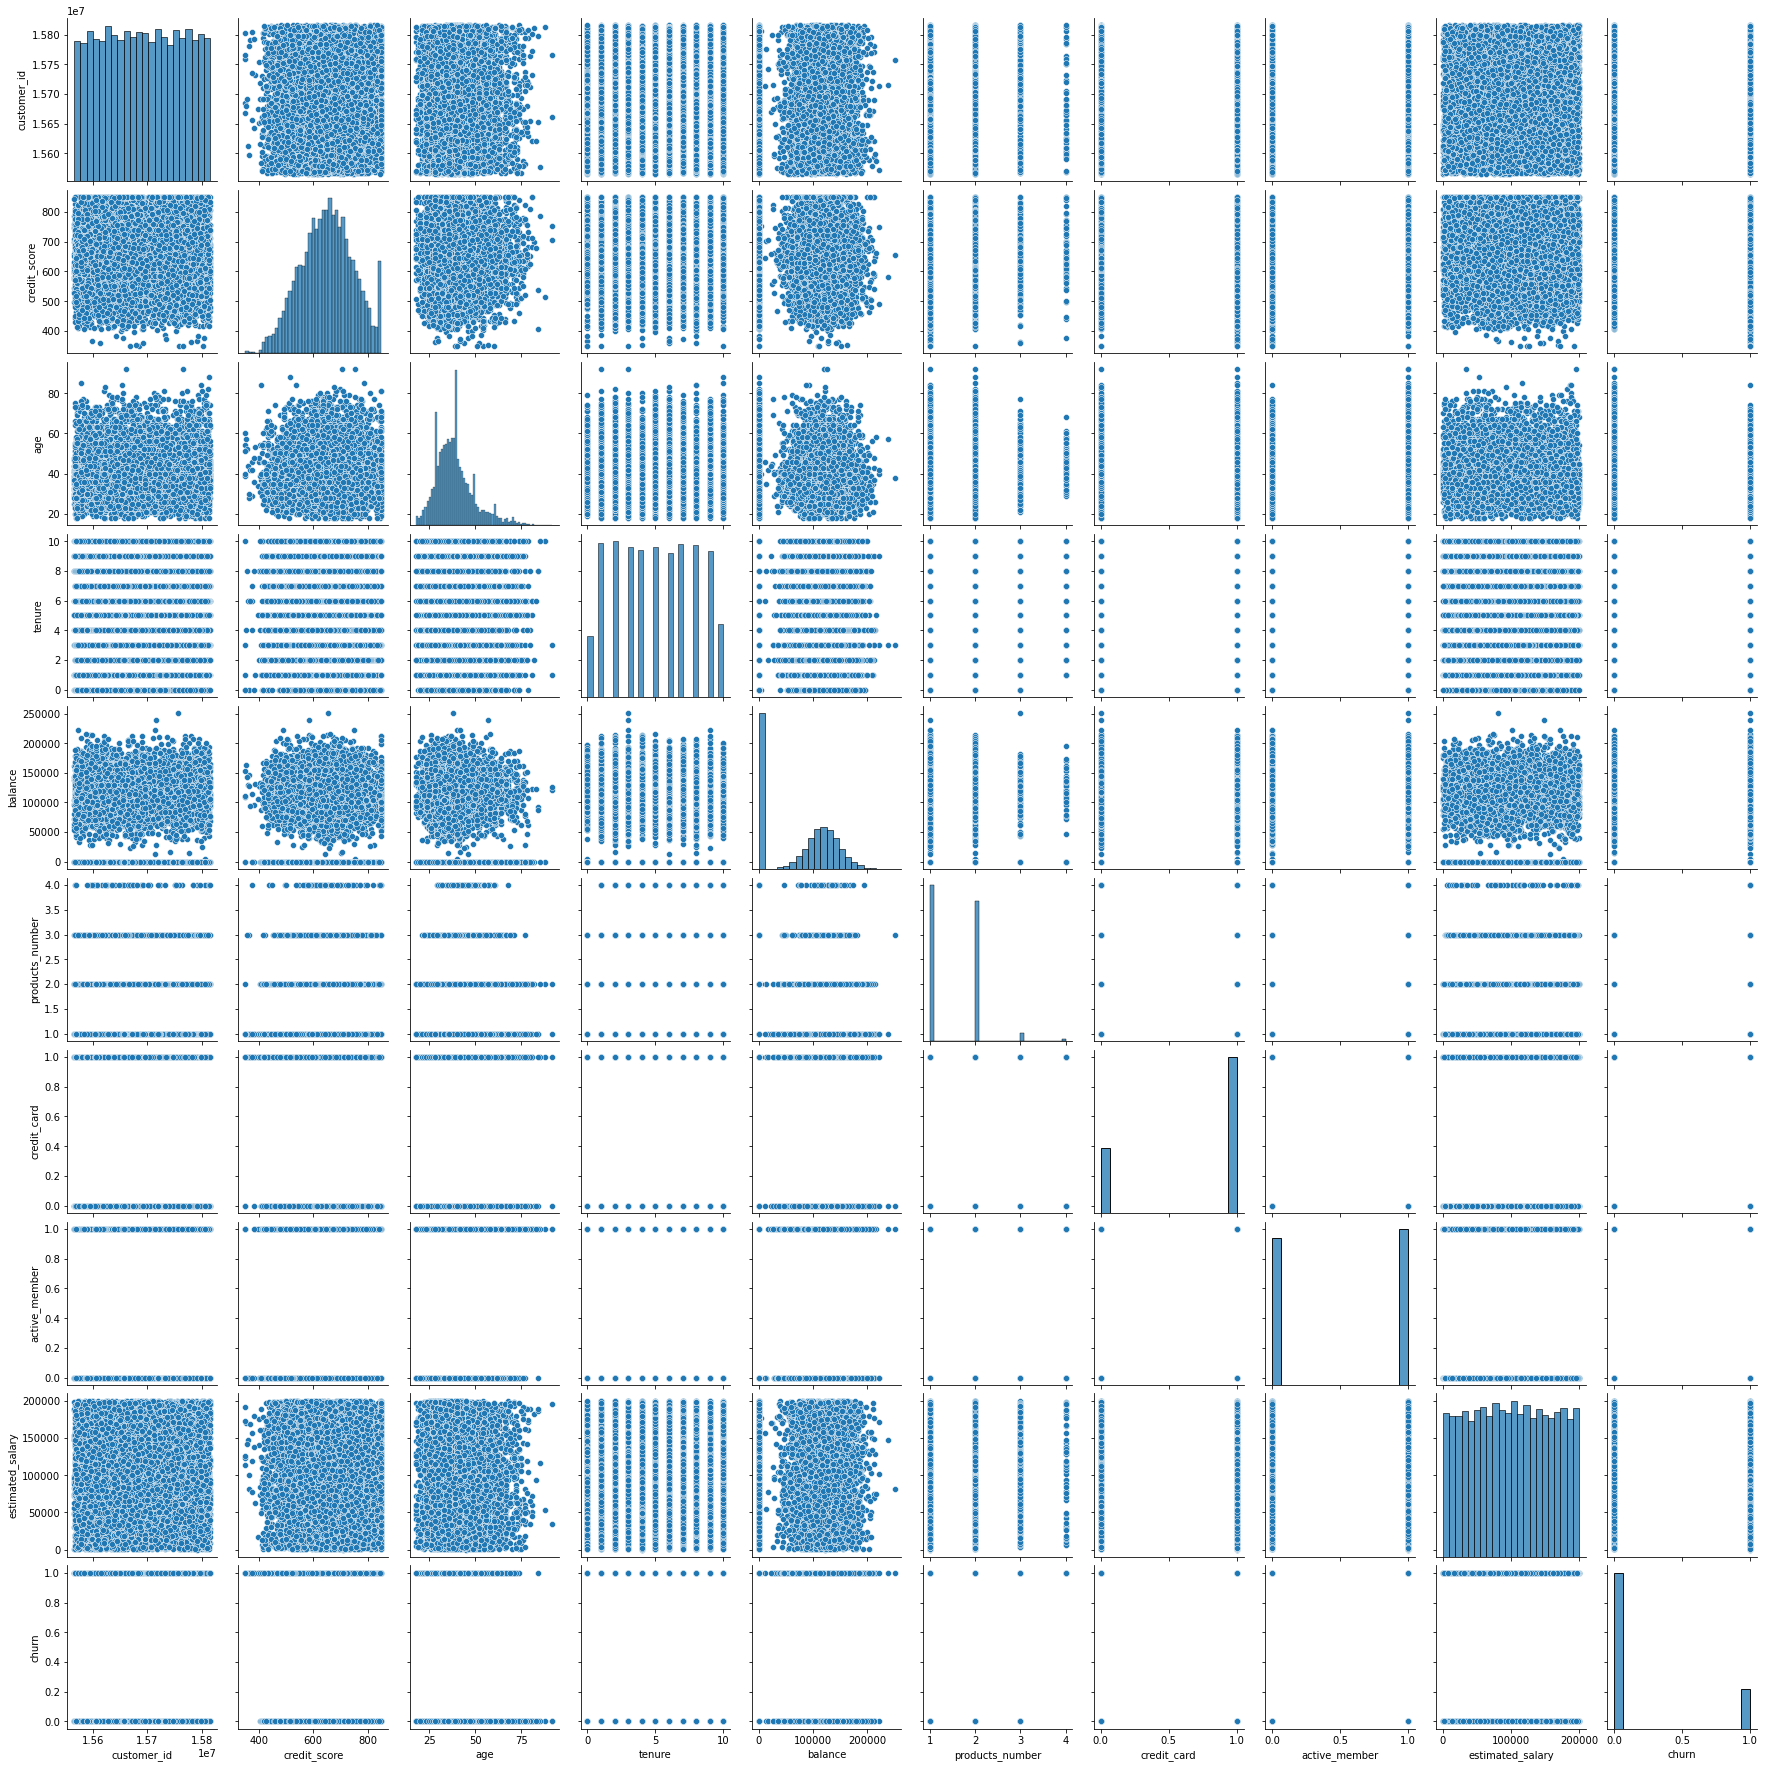

In [47]:
#Visualising parwise relationships between variables
sns.pairplot(df)
plt.show()

<AxesSubplot:>

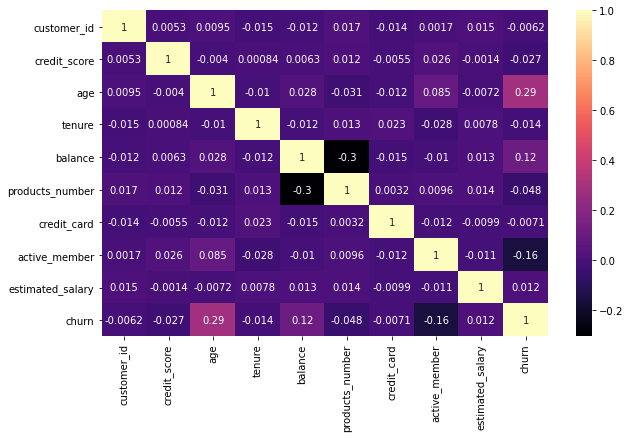

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="magma")

There are no highly correlated features

In [49]:
#Checking the Target Distribution
print(df["churn"].value_counts())
print(df["churn"].value_counts(normalize=True))

0    7963
1    2037
Name: churn, dtype: int64
0    0.7963
1    0.2037
Name: churn, dtype: float64


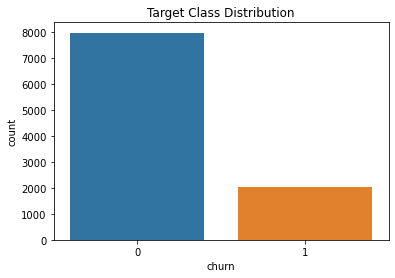

In [50]:
sns.countplot(x=df["churn"], data=df)
plt.title("Target Class Distribution")
plt.show()

The classes in the target variable are imbalanced

### Defining X(features) and y(target) variables

In [51]:
X = df.drop(columns=["churn", "customer_id"])
y = df["churn"]

### Train-test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Data Preprocessing

In [53]:
#Check for missing values
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Encoding categorical variables

In [54]:
#Initializing encoder object
ohe = OneHotEncoder(
    drop='first',
    handle_unknown='error',
    sparse=False
)

In [55]:
#Defining categorical features
categorical_features = ["country", "gender","tenure", "products_number", "credit_card", "active_member"]

#Defining X_train categorical features
X_train_categorical = X_train.copy()
X_train_categorical = X_train[categorical_features]

In [56]:
ohe.fit(X_train_categorical)

OneHotEncoder(drop='first', sparse=False)

In [57]:
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=ohe.get_feature_names(X_train_categorical.columns)
)


In [58]:
X_train_ohe.head()

,country_Germany,country_Spain,gender_Male,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_2,products_number_3,products_number_4,credit_card_1,active_member_1
7681,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
9031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [59]:
#Defining numeric vairiables
numeric_features = ["credit_score", "age", "tenure", "balance", "products_number"]

#Defining X_train_numeric features
X_train_numeric = X_train.copy()
X_train_numeric = X_train[numeric_features]
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
7681,641,France,Male,33,2,146193.60,2,1,1,55796.83
9031,541,France,Male,39,7,0.00,2,1,0,19823.02
3691,590,France,Female,76,5,160979.68,1,0,1,13848.58
202,516,Spain,Male,50,5,0.00,1,0,1,146145.93
5625,508,France,Female,60,7,143262.04,1,1,1,129562.74


### Scaling the numeric features

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,credit_score,age,tenure,balance,products_number
7681,-0.097921,-0.557598,-1.036351,1.132494,0.810394
9031,-1.126120,0.017259,0.697009,-1.199755,0.810394
3691,-0.622303,3.562216,0.003665,1.368379,-0.929716
202,-1.383170,1.071165,0.003665,-1.199755,-0.929716
5625,-1.465426,2.029262,0.697009,1.085727,-0.929716
...,...,...,...,...,...
9225,-0.581175,-0.653408,-0.343007,0.715820,0.810394
4859,1.475223,-1.611504,-0.343007,0.625928,-0.929716
3264,0.899432,-0.365979,0.003665,1.373075,0.810394
9845,-0.622303,-0.078550,1.390353,-1.199755,0.810394


In [108]:
#Concatenating all transformed columns
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full.head()

,credit_score,age,tenure,balance,products_number,country_Germany,country_Spain,gender_Male,tenure_1,tenure_2,...,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_2,products_number_3,products_number_4,credit_card_1,active_member_1
7681,-0.097921,-0.557598,-1.036351,1.132494,0.810394,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
9031,-1.126120,0.017259,0.697009,-1.199755,0.810394,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3691,-0.622303,3.562216,0.003665,1.368379,-0.929716,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202,-1.383170,1.071165,0.003665,-1.199755,-0.929716,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5625,-1.465426,2.029262,0.697009,1.085727,-0.929716,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Defining and training the baseline model

In [63]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver="liblinear")

In [64]:
logreg.fit(X_train_full, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Model Results

In [65]:
y_hat_train = logreg.predict(X_train_full)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    5887
1    1113
Name: Residuals (counts), dtype: int64

0    0.841
1    0.159
Name: Residuals (proportions), dtype: float64


In [107]:
# Handling categorical data
X_test_categorical = X_test.copy()
X_test_categorical = X_test[categorical_features]
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=ohe.get_feature_names(X_test_categorical.columns)
)

# Normalization
X_test_numeric = X_test.copy()
X_test_numeric = X_test[numeric_features]
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full.head()

,credit_score,age,tenure,balance,products_number,country_Germany,country_Spain,gender_Male,tenure_1,tenure_2,...,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,products_number_2,products_number_3,products_number_4,credit_card_1,active_member_1
6252,-0.560611,-0.653408,-0.689679,0.343060,0.810394,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4684,-0.282997,0.400498,-1.383024,-1.199755,0.810394,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1731,-0.509201,0.496308,-0.343007,-1.199755,0.810394,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4742,-1.485990,1.933452,1.043681,0.701097,0.810394,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4521,-0.930762,-1.132456,0.697009,0.794326,-0.929716,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [67]:
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2525
1     475
Name: Residuals (counts), dtype: int64

0    0.841667
1    0.158333
Name: Residuals (proportions), dtype: float64


### Confusion Matrix

In [68]:
cm = confusion_matrix(y_test, y_hat_test)
print(cm)

[[2270  109]
 [ 366  255]]


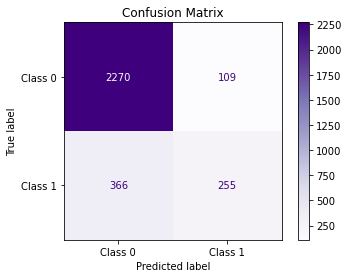

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['Class 0', 'Class 1'])
disp.plot(cmap="Purples")
plt.title('Confusion Matrix')
plt.show()


In [70]:

precision = precision_score(y_test, y_hat_test)
recall = recall_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)
accuracy = accuracy_score(y_test, y_hat_test)
auc_value = roc_auc_score(y_test, y_hat_test)

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

In [71]:

print(f"Precision:{precision}") 
print(f"Recall: {recall}") 
print(f"F1-score:{f1}") 
print(f"Accuracy:{accuracy}")
print(f"AUC value: {auc_value}")

Precision:0.7005494505494505
Recall: 0.4106280193236715
F1-score:0.5177664974619289
Accuracy:0.8416666666666667
AUC value: 0.6824052244579686


In [72]:
print(classification_report(y_true=y_test,y_pred=y_hat_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2379
           1       0.70      0.41      0.52       621

    accuracy                           0.84      3000
   macro avg       0.78      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000



## Model Results

### Class 1(minority class) - customers that are likely to stop doing business with the bank
The model has a precision  score of 0.70, meaning that it correctly predicts instances of customer churn correctly 71% of the time
It has a recall of 0.41, meaning that out of all instancs of customer churn, it only predicts 41% of them correctly.

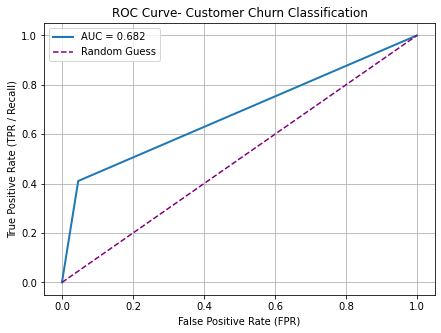

In [73]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.3f}", linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='purple', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.title("ROC Curve- Customer Churn Classification")
plt.legend()
plt.grid(True)
plt.show()

## Second logistic regression  model

This second model uses class weights to balance the classes

In [74]:
# Train with balanced class weights
logreg_weighted = LogisticRegression(class_weight='balanced', C=1e12, solver='liblinear')

logreg_weighted.fit(X_train_scaled, y_train)
y_hat_test_weighted = logreg_weighted.predict(X_test_scaled)
y_proba_weighted = logreg_weighted.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report (Weighted):")
print(classification_report(y_test, y_hat_test_weighted))




Classification Report (Weighted):
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2379
           1       0.38      0.70      0.49       621

    accuracy                           0.70      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.79      0.70      0.73      3000



Compared to the baseline model metrics for class 1(instances of customer churn), the model precision has sharply reduced to 38%, while the recall has increased to 70%. f1-score has reduced to 49%.

This means that the model may predict more false cases of churn(lower precision), but will predict more cases of actual churn(higher recall)

## Decision Tree

In [104]:
# Splitting into train/test
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [116]:
# Initializing the Decision Tree
clf = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,
    random_state=42
)

In [117]:
# Training the tree
clf.fit(X_train_full, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

Accuracy: 0.3487


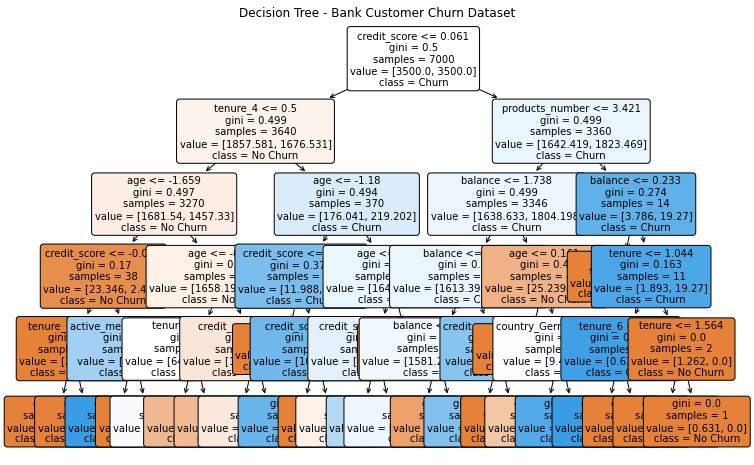

In [118]:
# Prediction
y_pred = clf.predict(X_test_full)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Visualizing the tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X_test_full.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Bank Customer Churn Dataset")
plt.show()

Decision Tree Classification Report

In [119]:
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.73      0.31      0.43      2416
       Churn       0.15      0.53      0.24       584

    accuracy                           0.35      3000
   macro avg       0.44      0.42      0.33      3000
weighted avg       0.62      0.35      0.39      3000



For class 1(churn), the model has a low precision score(0.15), recall of 53%, meaning that it only predicts 53% of churn instances correctly.

#### Hyperparameter Tuning

In [123]:
clf =  DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_full, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [125]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test_full)
print("Test Accuracy:", round(accuracy_score(y_test, y_pred),4))

Best Hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8083
